In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from mlxtend.classifier import StackingCVClassifier
import warnings

In [217]:
df = pd.read_csv('heart.csv')

In [218]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [219]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [220]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [222]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [223]:
df.duplicated().sum()

0

In [224]:
df_copy = df.copy

Text(0.5, 1.0, 'Heart Disease by Gender')

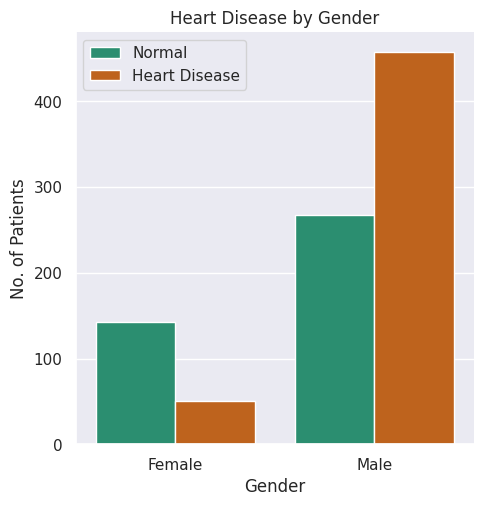

In [225]:
def enc_sex(data):
    if data == 'F':
        return 0
    elif data == 'M':
        return 1
df['enc_sex'] = df['Sex'].apply(enc_sex)

sns.catplot(x='enc_sex', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by Gender')

Text(0.5, 1.0, 'Heart Disease by Chest Pain Type')

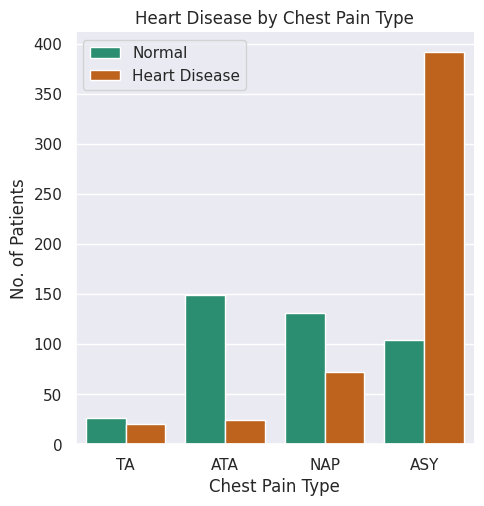

In [226]:
def enc_cpt(data):
    if data == 'TA':
        return 0
    if data == 'ATA':
        return 1
    if data == 'NAP':
        return 2
    elif data == 'ASY':
        return 3
df['enc_cpt'] = df['ChestPainType'].apply(enc_cpt)

sns.catplot(x='enc_cpt', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0,1,2,3], labels=['TA', 'ATA', 'NAP', 'ASY'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by Chest Pain Type')

Text(0.5, 1.0, 'Heart Disease by ST Slop')

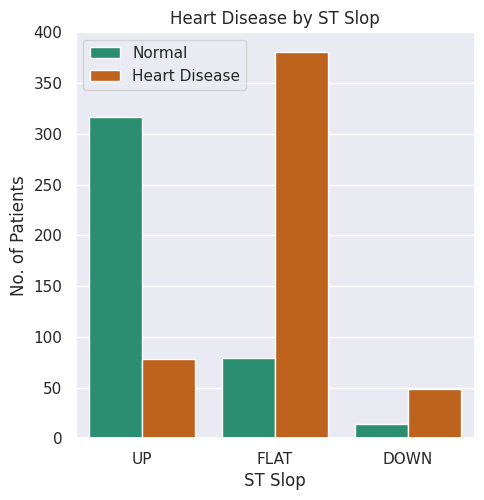

In [227]:
def enc_stslop(data):
    if data == 'Up':
        return 0
    if data == 'Flat':
        return 1
    elif data == 'Down':
        return 2
df['enc_stslop'] = df['ST_Slope'].apply(enc_stslop)

sns.catplot(x='enc_stslop', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('ST Slop')
plt.xticks(ticks=[0,1,2], labels=['UP', 'FLAT', 'DOWN'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by ST Slop')

Text(0.5, 1.0, 'Heart Disease by Fasting Blood Suger')

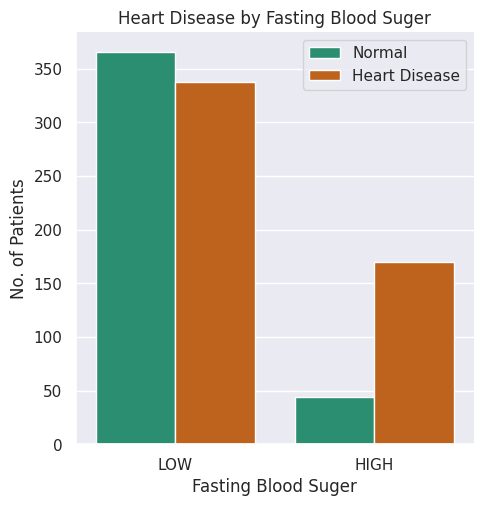

In [228]:
sns.catplot(x='FastingBS', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Fasting Blood Suger')
plt.xticks(ticks=[0,1], labels=['LOW', 'HIGH'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by Fasting Blood Suger')

Text(0.5, 1.0, 'Heart Disease by Age')

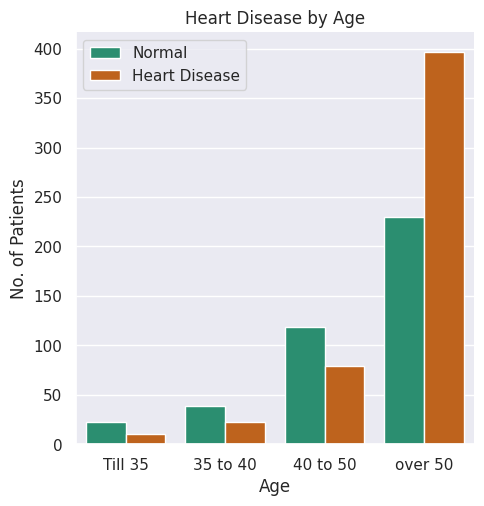

In [229]:
def enc_age(data):
    if data <= 35:
        return 0
    if 35 < data <=40:
        return 1
    if 40 < data <50:
        return 2
    elif data >= 50:
        return 3

df['enc_age'] = df['Age'].apply(enc_age)

sns.catplot( x='enc_age', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Age')
plt.xticks(ticks=[0,1,2,3], labels=['Till 35', '35 to 40', '40 to 50', 'over 50'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by Age')

Text(0.5, 1.0, 'Heart Disease by Resting Blood Pressure')

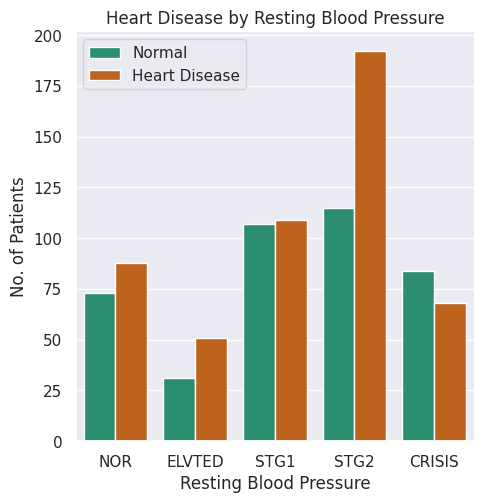

In [230]:
def restingBP_enc(data):
    if data < 120:
        return 0
    elif 121 <= data <=129:
        return 1
    elif 130 <= data <=139:
        return 2
    elif 140 <= data <=179:
        return 3
    else:
        return 4

df['enc_restingBP'] = df['RestingBP'].apply(restingBP_enc)

sns.catplot(x='enc_restingBP', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3,4], labels=['NOR', 'ELVTED','STG1', 'STG2','CRISIS'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by Resting Blood Pressure')

Text(0.5, 1.0, 'Heart Disease by Serum cholesterol level')

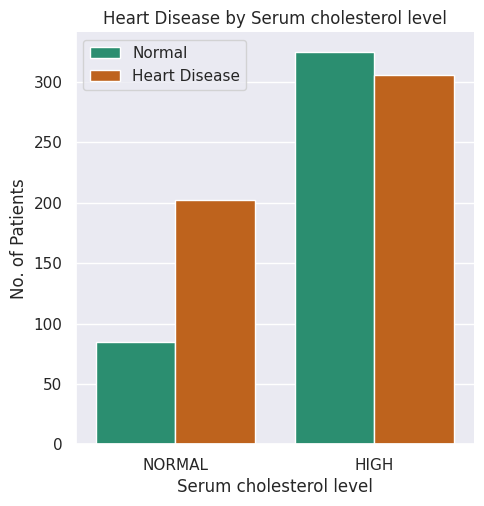

In [231]:
# Heart UK (2024), Serum cholesterol level 193 mg /dl

def serumCol_enc(data):
    if data <= 193:
        return 0
    elif 194 <= data:
        return 1


df['enc_serumCol'] = df['Cholesterol'].apply(serumCol_enc)

sns.catplot(x='enc_serumCol', hue='HeartDisease', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Serum cholesterol level')
plt.xticks(ticks=[0,1], labels=['NORMAL', 'HIGH'])
plt.ylabel('No. of Patients')
plt.legend(['Normal', 'Heart Disease'])
plt.title('Heart Disease by Serum cholesterol level')

In [232]:
df1 = df.drop(columns=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope','enc_sex','enc_cpt','enc_stslop','enc_age','enc_restingBP','enc_serumCol'])

<Axes: title={'center': 'Correlation of Features'}>

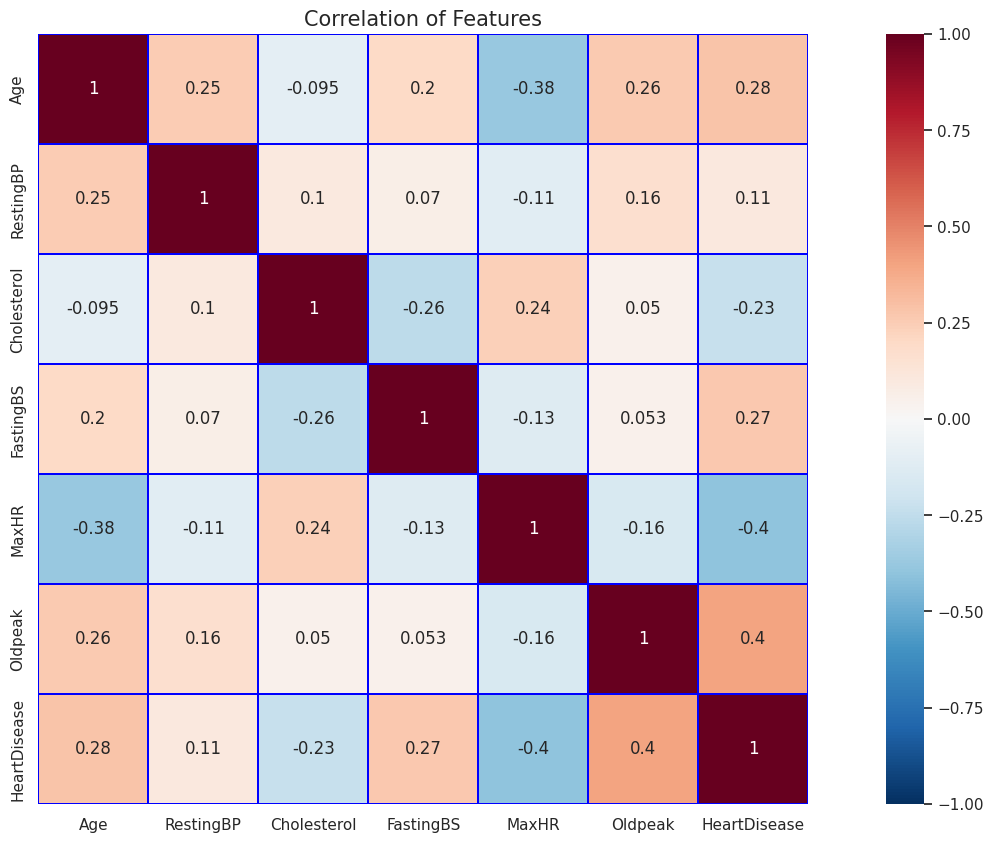

In [233]:
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(20,10))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(df1.corr(), linewidths=0.15,vmin=-1.0, vmax=1.0,
            square=True, cmap=colormap, linecolor='blue', annot=True)

In [234]:
'DIMENSIONALITY REDUCTION'
'Check for Multi-collinearity by Identifying and removing the highly correlated features'
# Create correlation matrix
corr_matrix = df1.corr().abs()

# Select lower triangle of correlation matrix
lower = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.90
high_corr = [column for column in lower.columns if any(lower[column] >= 0.3)]

In [235]:
  high_corr

['MaxHR', 'HeartDisease']

In [236]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,enc_sex,enc_cpt,enc_stslop,enc_age,enc_restingBP,enc_serumCol
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,1,3,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,2,3,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,0,1,2,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,3,1,2,2,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,0,3,3,1


In [237]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='Cholesterol'>

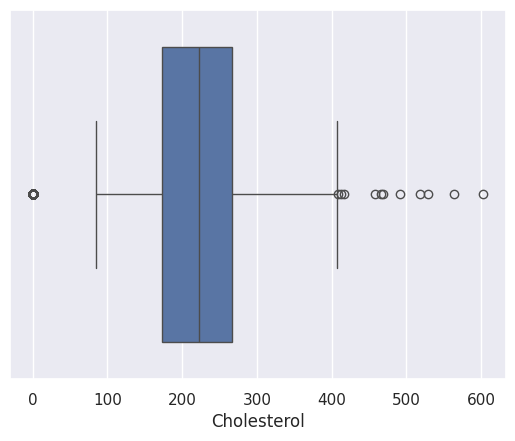

In [238]:
sns.boxplot(x=df["Cholesterol"])

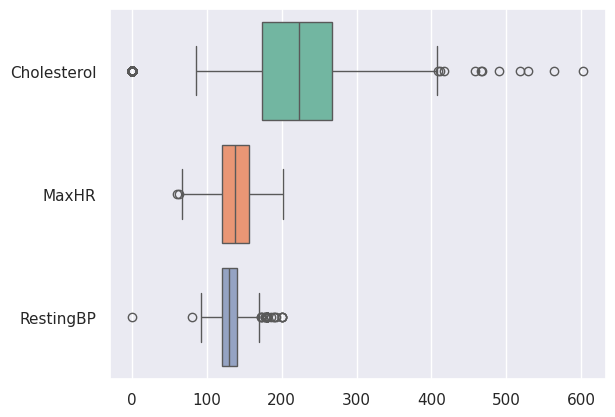

In [239]:
#checking for outliers
'MULTIVARIATE ANALYSIS'
df_ = df[['Cholesterol', 'MaxHR', 'RestingBP']]
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

<Axes: xlabel='MaxHR'>

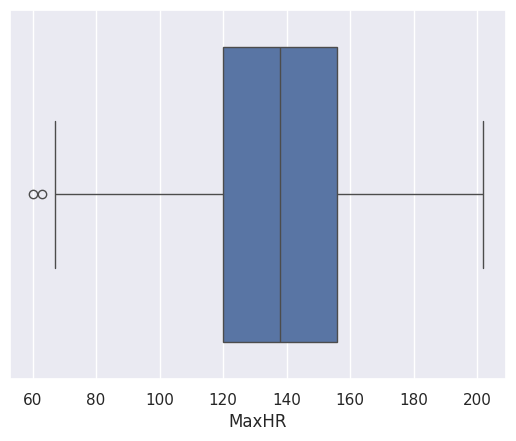

In [240]:
sns.boxplot(x=df["MaxHR"])

<Axes: xlabel='RestingBP'>

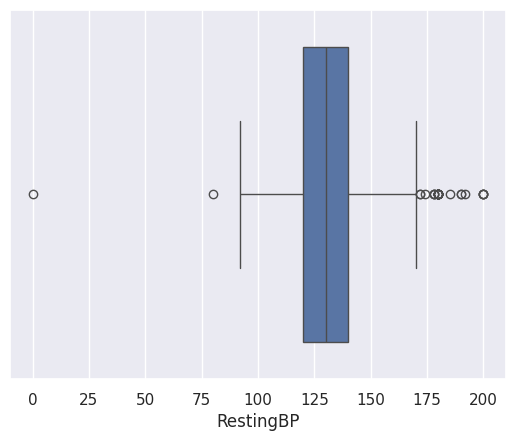

In [241]:
sns.boxplot(x=df["RestingBP"])

Text(0, 0.5, 'MaxHR')

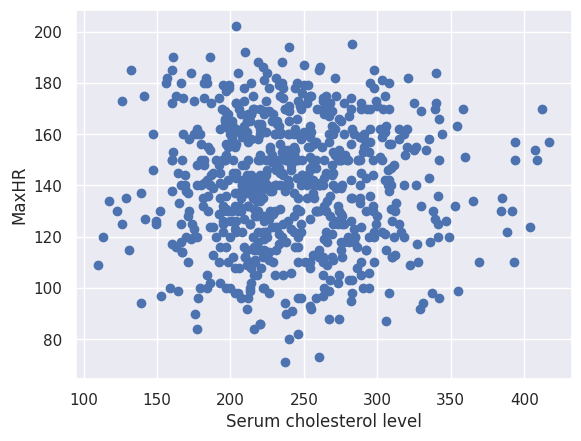

In [242]:
#Outlier removal
col = 'Cholesterol'
df_Coles =  df1[(df1[col]<450) & (100<df1[col])].copy()
plt.scatter(df_Coles[col], df_Coles.MaxHR)
plt.xlabel('Serum cholesterol level')
plt.ylabel('MaxHR')
# plt.title('Heart Disease by Serum cholesterol level')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


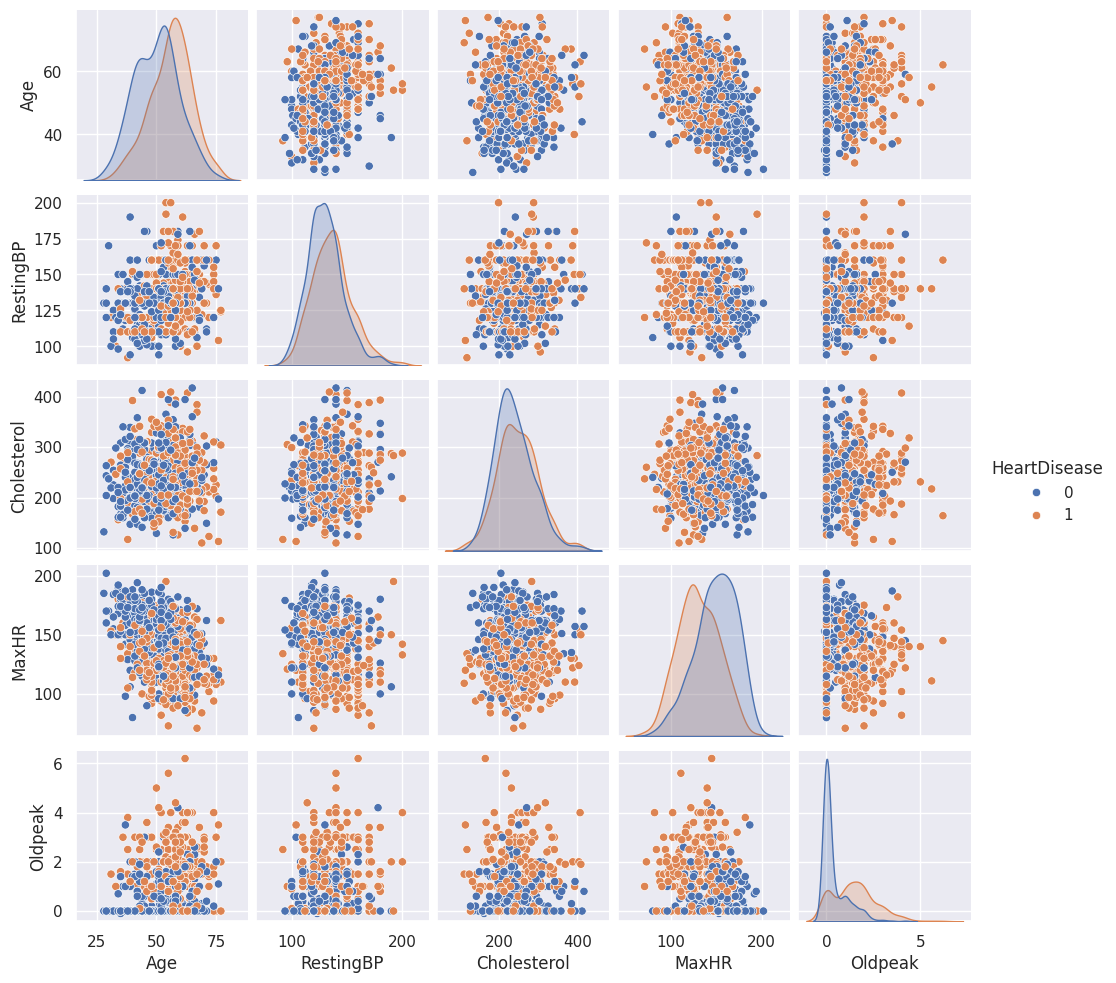

In [243]:
sns.set()
df2 = df_Coles.drop(columns=['FastingBS'])
sns.pairplot(df2, size = 2.0,hue ='HeartDisease')
plt.show()

In [244]:
x=df_Coles.drop(["HeartDisease"],axis=1)
y=df_Coles["HeartDisease"]



Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       112
           1       0.86      0.82      0.84       109

    accuracy                           0.84       221
   macro avg       0.84      0.84      0.84       221
weighted avg       0.84      0.84      0.84       221

Testing Accuracy for Decision Tree: 0.8416289592760181
Testing Sensitivity for Decision Tree: 0.8290598290598291
Testing Specificity for Decision Tree: 0.8557692307692307
Testing Precision for Decision Tree: 0.8660714285714286


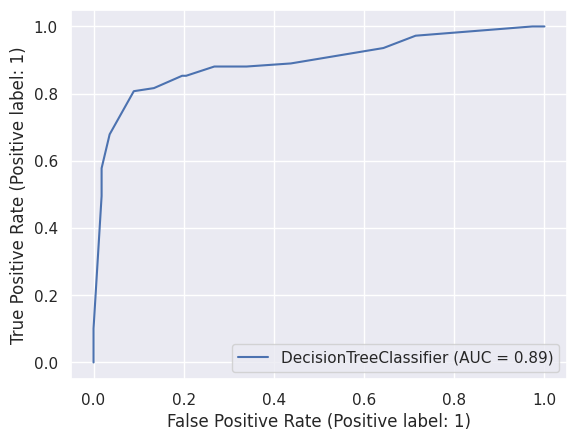



Random Forest
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       112
           1       0.79      0.70      0.74       109

    accuracy                           0.76       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.76      0.76      0.76       221

Testing Accuracy for Random Forest: 0.7601809954751131
Testing Sensitivity for Random Forest: 0.736
Testing Specificity for Random Forest: 0.7916666666666666
Testing Precision for Random Forest: 0.8214285714285714


<Figure size 640x480 with 0 Axes>

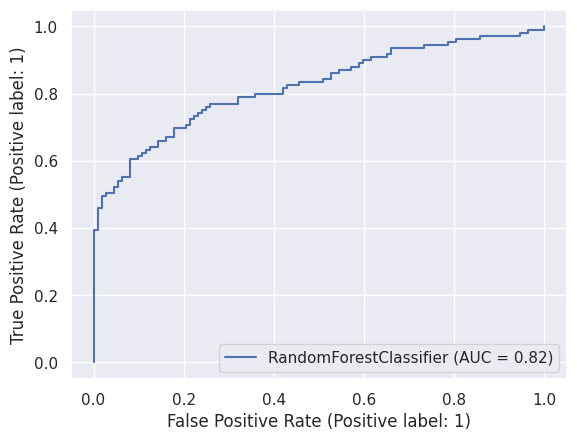



Naive Bayes


Testing Accuracy for Naive Bayes: 0.751131221719457
Testing Sensitivity for Naive Bayes: 0.7244094488188977
Testing Specificity for Naive Bayes: 0.7872340425531915
Testing Precision for Naive Bayes: 0.8214285714285714


              precision    recall  f1-score   support

           0       0.72      0.82      0.77       112
           1       0.79      0.68      0.73       109

    accuracy                           0.75       221
   macro avg       0.76      0.75      0.75       221
weighted avg       0.76      0.75      0.75       221



<Figure size 640x480 with 0 Axes>

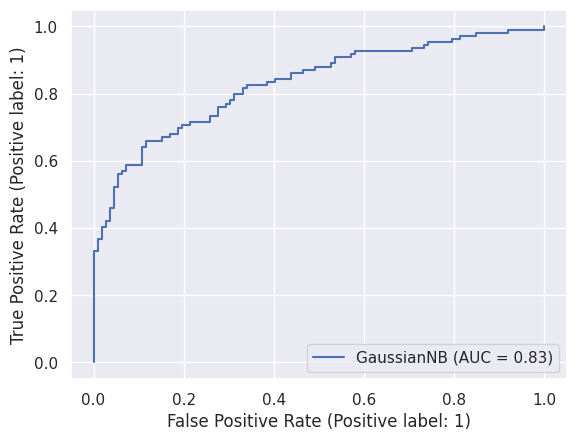



Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       112
           1       0.78      0.75      0.77       109

    accuracy                           0.77       221
   macro avg       0.77      0.77      0.77       221
weighted avg       0.77      0.77      0.77       221



Testing Accuracy for Logistic Regression: 0.7737556561085973
Testing Sensitivity for Logistic Regression: 0.7672413793103449
Testing Specificity for Logistic Regression: 0.780952380952381
Testing Precision for Logistic Regression: 0.7946428571428571


<Figure size 640x480 with 0 Axes>

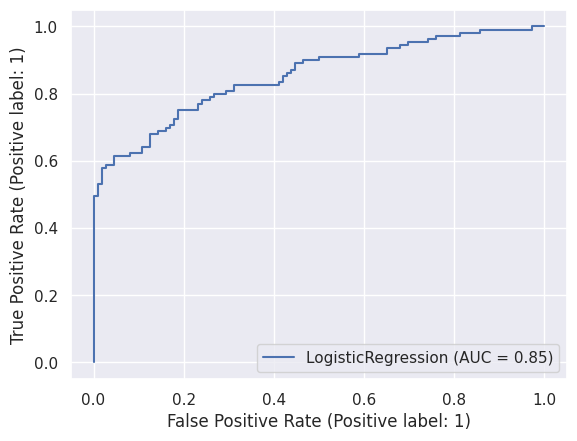



SVM
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       112
           1       0.70      0.53      0.60       109

    accuracy                           0.66       221
   macro avg       0.66      0.65      0.65       221
weighted avg       0.66      0.66      0.65       221



Testing Accuracy for Support Vector Machine: 0.6561085972850679
Testing Sensitivity for Support Vector Machine: 0.6304347826086957
Testing Specificity for Support Vector Machine: 0.6987951807228916
Testing Precision for Support Vector Machine: 0.7767857142857143


<Figure size 640x480 with 0 Axes>

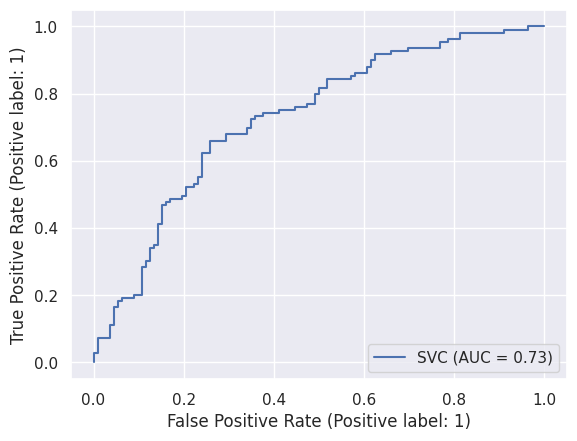



KNN


              precision    recall  f1-score   support

           0       0.62      0.66      0.64       112
           1       0.63      0.59      0.61       109

    accuracy                           0.62       221
   macro avg       0.62      0.62      0.62       221
weighted avg       0.62      0.62      0.62       221

Testing Accuracy for KNN: 0.6244343891402715
Testing Sensitivity for KNN: 0.6218487394957983
Testing Specificity for KNN: 0.6274509803921569
Testing Precision for KNN: 0.6607142857142857


<Figure size 640x480 with 0 Axes>

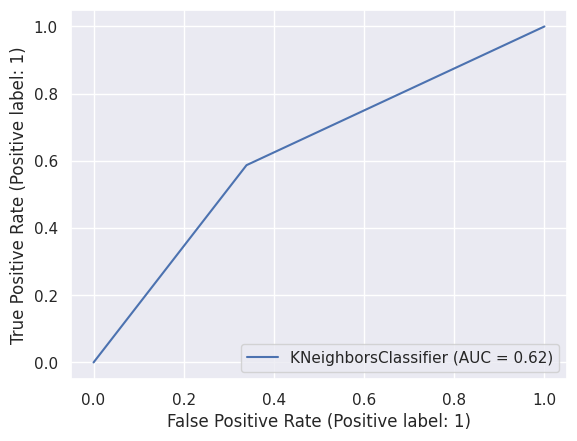



Ensemble Model


              precision    recall  f1-score   support

           0       0.72      0.83      0.77       112
           1       0.79      0.67      0.73       109

    accuracy                           0.75       221
   macro avg       0.76      0.75      0.75       221
weighted avg       0.76      0.75      0.75       221

Testing Accuracy for Ensemble model: 0.751131221719457
Testing Sensitivity for Ensemble model: 0.7209302325581395
Testing Specificity for Ensemble model: 0.7934782608695652
Testing Precision for Ensemble model: 0.8303571428571429


<Figure size 640x480 with 0 Axes>

In [266]:
# SMOTE is not applied and Decision Tree

from sklearn.model_selection import train_test_split


x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)
#columns = x_train1.columns


from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='gini')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(x_test1)
cm= confusion_matrix(y_test1,prediction)
#sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print('\n')
print('Decision Tree')
print(classification_report(y_test1, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

# ROC CURVE

from sklearn.metrics import RocCurveDisplay
roc_plot = RocCurveDisplay.from_estimator(m, x_test1, y_test1)
plt.savefig("DT-sklearn_roc_plot.png")
plt.show()
plt.clf()

print('\n')

print('Random Forest')
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(x_train1, y_train1)
prediction3 = model3.predict(x_test1)
cm3=confusion_matrix(y_test1, prediction3)
#sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test1, prediction3))
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

# ROC CURVE
roc_plot = RocCurveDisplay.from_estimator(model3, x_test1, y_test1)
plt.savefig("RF-sklearn_roc_plot.png")
plt.show()
plt.clf()

print('\n')

print('Naive Bayes')
gnb = GaussianNB()
gnb1=gnb.fit(x_train1,y_train1)
ypred_gnb2=gnb.predict(x_train1)
ypred_gnb=gnb.predict(x_test1)
gnb_model=accuracy_score(ypred_gnb,y_test1,normalize=True, sample_weight=None)
gnb_model2=accuracy_score(ypred_gnb2,y_train1,normalize=True, sample_weight=None)

print("\n")
cm=confusion_matrix(y_test1,ypred_gnb)
cm
#sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Naive Bayes:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Naive Bayes:',(TP/(TP+FN)))
print('Testing Specificity for Naive Bayes:',(TN/(TN+FP)))
print('Testing Precision for Naive Bayes:',(TP/(TP+FP)))
print("\n")
print(classification_report(y_test1, ypred_gnb))

# ROC CURVE
roc_plot = RocCurveDisplay.from_estimator(gnb1, x_test1, y_test1)
plt.savefig("NB-sklearn_roc_plot.png")
plt.show()
plt.clf()

print('\n')

print('Logistic Regression')
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(x_train1,y_train1)
prediction1=model1.predict(x_test1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,prediction1)
cm
print(classification_report(y_test1, prediction1))
print('\n')
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

# ROC CURVE
roc_plot = RocCurveDisplay.from_estimator(model1, x_test1, y_test1)
plt.savefig("LR-sklearn_roc_plot.png")
plt.show()
plt.clf()

print('\n')

print('SVM')
from sklearn.svm import SVC
svm = SVC()
svm1=svm.fit(x_train1,y_train1)

ypred_svm2=svm.predict(x_train1)
ypred_svm=svm.predict(x_test1)
lr_model=accuracy_score(ypred_svm,y_test1,normalize=True, sample_weight=None)
lr_model2=accuracy_score(ypred_svm2,y_train1,normalize=True, sample_weight=None)

cm=confusion_matrix(y_test1,ypred_svm)
cm
print(classification_report(y_test1, ypred_svm))
print('\n')
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Support Vector Machine:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Support Vector Machine:',(TP/(TP+FN)))
print('Testing Specificity for Support Vector Machine:',(TN/(TN+FP)))
print('Testing Precision for Support Vector Machine:',(TP/(TP+FP)))

# ROC CURVE
roc_plot = RocCurveDisplay.from_estimator(svm1, x_test1, y_test1)
plt.savefig("SVM-sklearn_roc_plot.png")
plt.show()
plt.clf()

print('\n')

print('KNN')
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train1, y_train1)
knn_predict = knn.predict(x_test1)
knn_conf_matrix = confusion_matrix(y_test1, knn_predict)
knn_acc_score = accuracy_score(y_test1, knn_predict)

print("\n")
cm=confusion_matrix(y_test1,knn_predict)
cm
print(classification_report(y_test1, knn_predict))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))

# ROC CURVE
roc_plot = RocCurveDisplay.from_estimator(model, x_test1, y_test1)
plt.savefig("KNN-sklearn_roc_plot.png")
plt.show()
plt.clf()

print('\n')

print('Ensemble Model')
scv=StackingCVClassifier(classifiers=[lr,svm,gnb,knn,rfc], meta_classifier= tree_model)
scv.fit(x_train1,y_train1)
scv_predicted = scv.predict(x_test1)
scv_conf_matrix = confusion_matrix(y_test1, scv_predicted)
scv_acc_score = accuracy_score(y_test1, scv_predicted)
print("\n")
print(classification_report(y_test1,scv_predicted))


TP=scv_conf_matrix[0][0]
TN=scv_conf_matrix[1][1]
FN=scv_conf_matrix[1][0]
FP=scv_conf_matrix[0][1]

print('Testing Accuracy for Ensemble model:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Ensemble model:',(TP/(TP+FN)))
print('Testing Specificity for Ensemble model:',(TN/(TN+FP)))
print('Testing Precision for Ensemble model:',(TP/(TP+FP)))

In [246]:
y_train1.value_counts()

HeartDisease
0    273
1    241
Name: count, dtype: int64

In [247]:
y_test1.value_counts()

HeartDisease
0    112
1    109
Name: count, dtype: int64

In [248]:
# SMOTE is applied

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state= 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns

x_train, y_train = os.fit_resample(x_train, y_train)
x_test, y_test = os.fit_resample(x_test, y_test)
#os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
#os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])

In [249]:
y_train.value_counts()

HeartDisease
0    273
1    273
Name: count, dtype: int64

In [250]:
y_test.value_counts()

HeartDisease
0    112
1    112
Name: count, dtype: int64

In [251]:
#standard=StandardScaler()
#x_train=standard.fit_transform(x_train)

##Decision Tree

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.86      0.81      0.83       112

    accuracy                           0.84       224
   macro avg       0.84      0.84      0.84       224
weighted avg       0.84      0.84      0.84       224

Testing Accuracy for Decision Tree: 0.8392857142857143
Testing Sensitivity for Decision Tree: 0.8220338983050848
Testing Specificity for Decision Tree: 0.8584905660377359
Testing Precision for Decision Tree: 0.8660714285714286


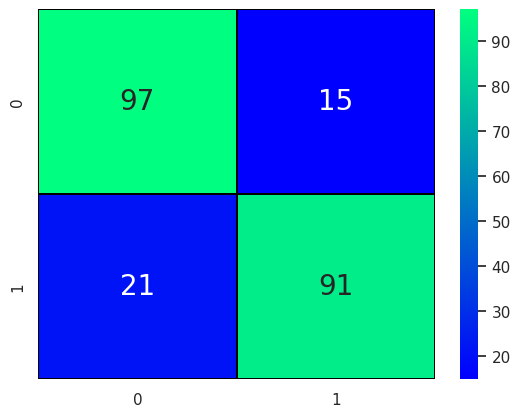

In [267]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='gini')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(x_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

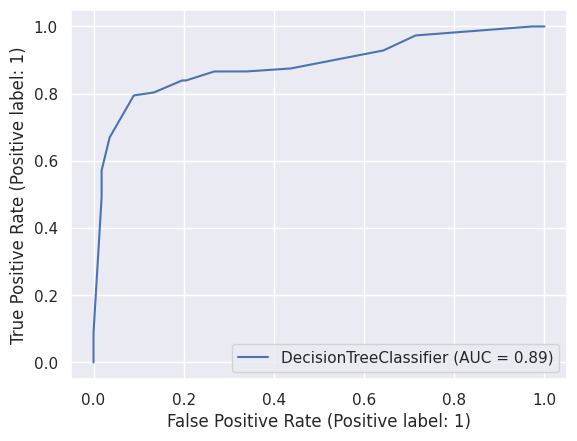

<Figure size 640x480 with 0 Axes>

In [253]:
from sklearn.metrics import RocCurveDisplay


tree_model = DecisionTreeClassifier(max_depth=5,criterion='gini')
#cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)

roc_plot = RocCurveDisplay.from_estimator(m, x_test, y_test)

plt.savefig("DT-S-sklearn_roc_plot.png")
plt.show()
plt.clf()

##Random Forest

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       112
           1       0.79      0.72      0.75       112

    accuracy                           0.76       224
   macro avg       0.77      0.76      0.76       224
weighted avg       0.77      0.76      0.76       224

Testing Accuracy for Random Forest: 0.7633928571428571
Testing Sensitivity for Random Forest: 0.743801652892562
Testing Specificity for Random Forest: 0.7864077669902912
Testing Precision for Random Forest: 0.8035714285714286


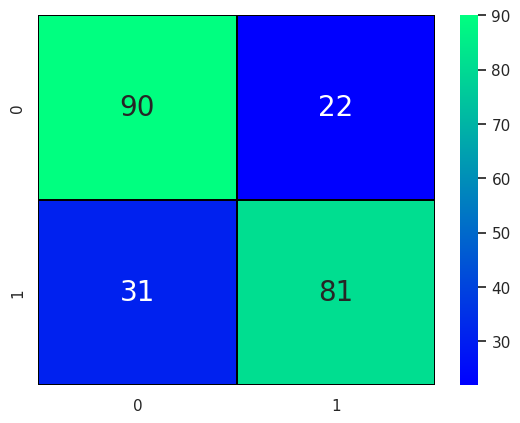

In [254]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(x_train, y_train)
prediction3 = model3.predict(x_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction3))

TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

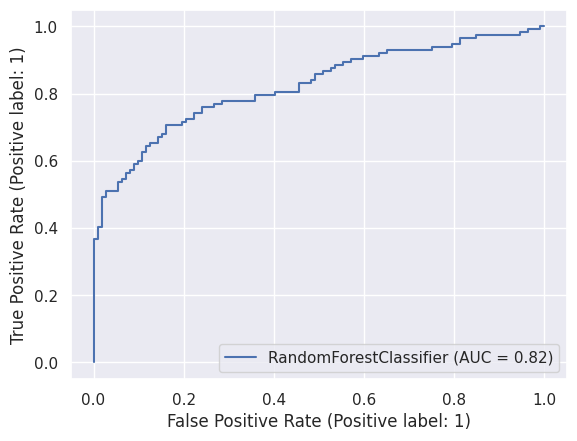

<Figure size 640x480 with 0 Axes>

In [255]:
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(x_train, y_train)

roc_plot = RocCurveDisplay.from_estimator(model3, x_test, y_test)
plt.savefig("RF-S-sklearn_roc_plot.png")
plt.show()
plt.clf()

##Naive Bayes

accuracy for test set :0.7544642857142857
accuracy for train set :0.7564102564102564

after cross validation the accuracy is 0.75


Testing Accuracy for Naive Bayes: 0.7544642857142857
Testing Sensitivity for Naive Bayes: 0.7355371900826446
Testing Specificity for Naive Bayes: 0.7766990291262136
Testing Precision for Naive Bayes: 0.7946428571428571


              precision    recall  f1-score   support

           0       0.74      0.79      0.76       112
           1       0.78      0.71      0.74       112

    accuracy                           0.75       224
   macro avg       0.76      0.75      0.75       224
weighted avg       0.76      0.75      0.75       224



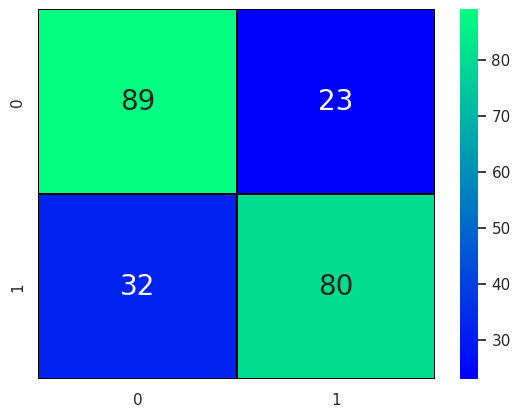

In [256]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
ypred_gnb2=gnb.predict(x_train)
ypred_gnb=gnb.predict(x_test)
gnb_model=accuracy_score(ypred_gnb,y_test,normalize=True, sample_weight=None)
gnb_model2=accuracy_score(ypred_gnb2,y_train,normalize=True, sample_weight=None)

print(f"accuracy for test set :{gnb_model}\naccuracy for train set :{gnb_model2}")
score1 = cross_val_score(gnb, x_train, y_train, cv = 30)
print(f"\nafter cross validation the accuracy is {round(score1.mean(),2)}")
#print(score1)
print("\n")
cm=confusion_matrix(y_test,ypred_gnb)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Naive Bayes:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Naive Bayes:',(TP/(TP+FN)))
print('Testing Specificity for Naive Bayes:',(TN/(TN+FP)))
print('Testing Precision for Naive Bayes:',(TP/(TP+FP)))
print("\n")
print(classification_report(y_test, ypred_gnb))

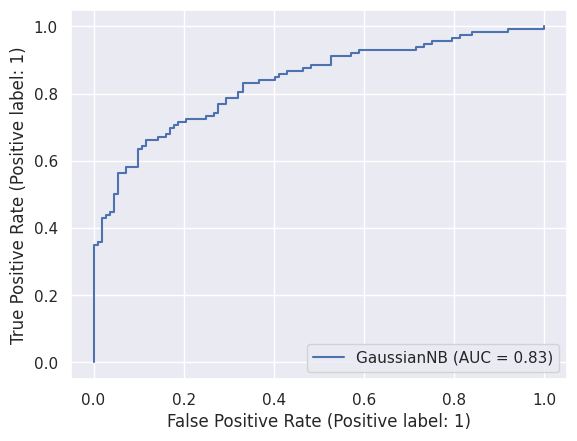

<Figure size 640x480 with 0 Axes>

In [257]:
gnb = GaussianNB()
model=gnb.fit(x_train,y_train)

roc_plot = RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.savefig("NB-S-sklearn_roc_plot.png")
plt.show()
plt.clf()


##Logistic Regression

accuracy for test set :0.78125
accuracy for train set :0.76007326007326


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


after cross validation the accuracy is 0.75


Testing Accuracy for Logistic Regression: 0.78125
Testing Sensitivity for Logistic Regression: 0.7647058823529411
Testing Specificity for Logistic Regression: 0.8
Testing Precision for Logistic Regression: 0.8125


              precision    recall  f1-score   support

           0       0.76      0.81      0.79       112
           1       0.80      0.75      0.77       112

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.78      0.78      0.78       224



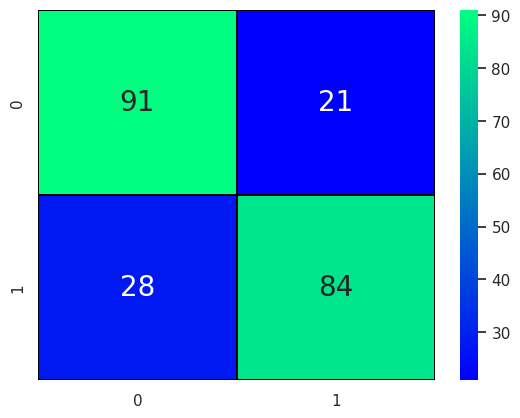

In [258]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypred_lr2=lr.predict(x_train)
ypred_lr=lr.predict(x_test)
lr_model=accuracy_score(ypred_lr,y_test,normalize=True, sample_weight=None)
lr_model2=accuracy_score(ypred_lr2,y_train,normalize=True, sample_weight=None)

print(f"accuracy for test set :{lr_model}\naccuracy for train set :{lr_model2}")
score1 = cross_val_score(lr, x_train, y_train, cv = 30)
print(f"\nafter cross validation the accuracy is {round(score1.mean(),2)}")
print("\n")
cm=confusion_matrix(y_test,ypred_lr)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))
print("\n")
print(classification_report(y_test, ypred_lr))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       112
           1       0.80      0.75      0.77       112

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.78      0.78      0.78       224

Testing Accuracy for Logistic Regression: 0.78125
Testing Sensitivity for Logistic Regression: 0.7647058823529411
Testing Specificity for Logistic Regression: 0.8
Testing Precision for Logistic Regression: 0.8125


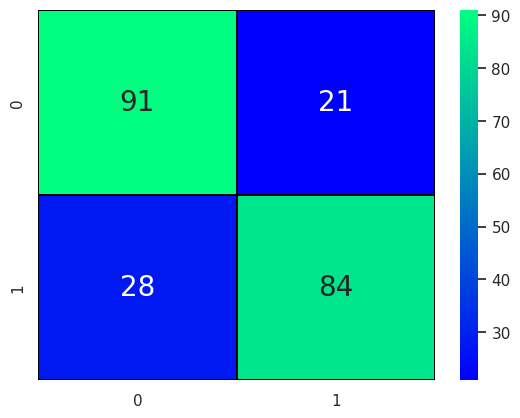

In [259]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction1))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

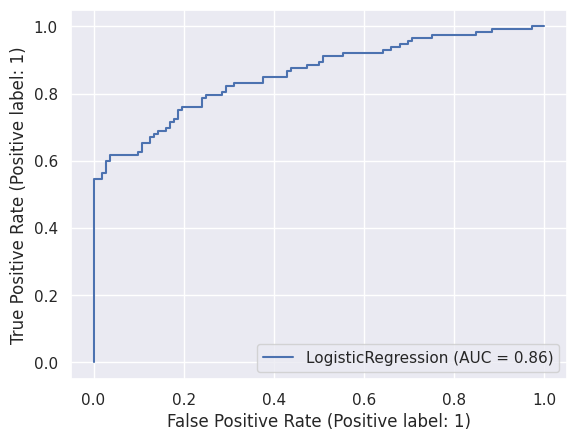

<Figure size 640x480 with 0 Axes>

In [260]:
from sklearn.metrics import RocCurveDisplay

classifier = LogisticRegression()
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

roc_plot = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
plt.savefig("LR-S-sklearn_roc_plot.png")
plt.show()
plt.clf()

##Support Vector Machine

accuracy for test set :0.6875
accuracy for train set :0.6959706959706959


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


after cross validation the accuracy is 0.75
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       112
           1       0.71      0.63      0.67       112

    accuracy                           0.69       224
   macro avg       0.69      0.69      0.69       224
weighted avg       0.69      0.69      0.69       224

Testing Accuracy for Support Vector Machine: 0.6875
Testing Sensitivity for Support Vector Machine: 0.6693548387096774
Testing Specificity for Support Vector Machine: 0.71
Testing Precision for Support Vector Machine: 0.7410714285714286


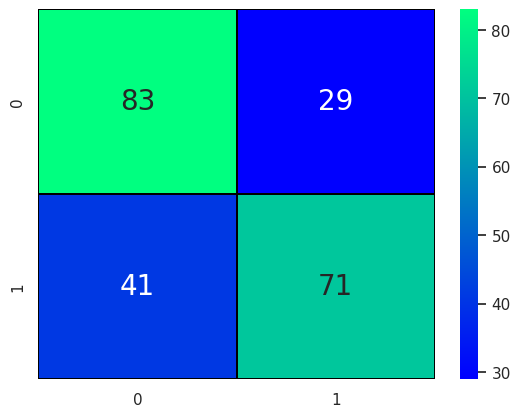

In [261]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

ypred_svm2=svm.predict(x_train)
ypred_svm=svm.predict(x_test)
lr_model=accuracy_score(ypred_svm,y_test,normalize=True, sample_weight=None)
lr_model2=accuracy_score(ypred_svm2,y_train,normalize=True, sample_weight=None)

print(f"accuracy for test set :{lr_model}\naccuracy for train set :{lr_model2}")
score1 = cross_val_score(lr, x_train, y_train, cv = 30)
print(f"\nafter cross validation the accuracy is {round(score1.mean(),2)}")

cm=confusion_matrix(y_test,ypred_svm)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, ypred_svm))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Support Vector Machine:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Support Vector Machine:',(TP/(TP+FN)))
print('Testing Specificity for Support Vector Machine:',(TN/(TN+FP)))
print('Testing Precision for Support Vector Machine:',(TP/(TP+FP)))

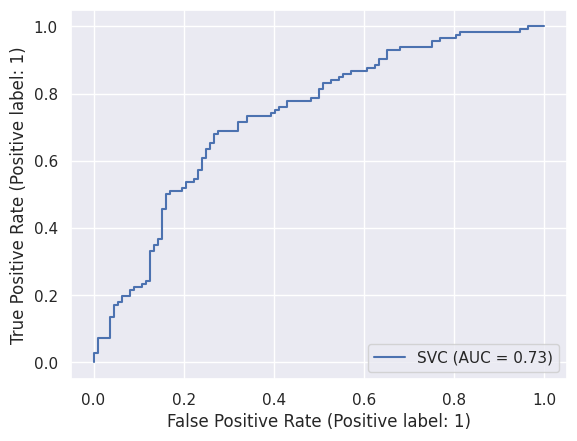

<Figure size 640x480 with 0 Axes>

In [262]:
from sklearn.metrics import RocCurveDisplay

classifier = SVC()
classifier.fit(x_train,y_train)
#y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

roc_plot = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
plt.savefig("SVM-S-sklearn_roc_plot.png")
plt.show()
plt.clf()

##K-Nearest Naighbor (KNN)



Accuracy of k-NN Classification: 0.6383928571428571 

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       112
           1       0.64      0.62      0.63       112

    accuracy                           0.64       224
   macro avg       0.64      0.64      0.64       224
weighted avg       0.64      0.64      0.64       224

Testing Accuracy for KNN: 0.6383928571428571
Testing Sensitivity for KNN: 0.6324786324786325
Testing Specificity for KNN: 0.6448598130841121
Testing Precision for KNN: 0.6607142857142857


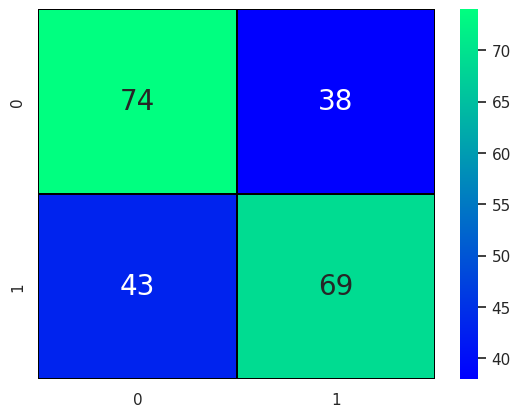

In [263]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)

print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score,'\n')
cm=confusion_matrix(y_test,knn_predict)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, knn_predict))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))

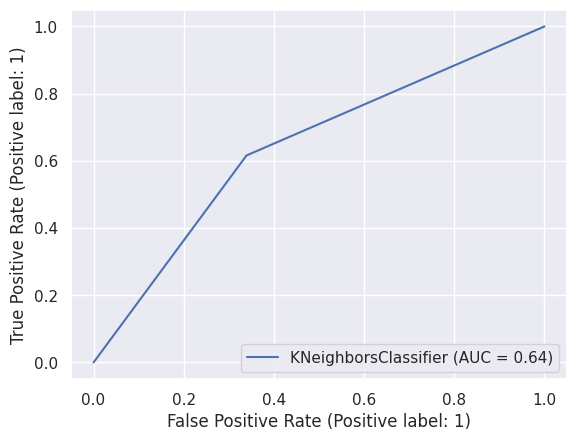

<Figure size 640x480 with 0 Axes>

In [264]:
from sklearn.metrics import RocCurveDisplay


knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train, y_train)

roc_plot = RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.savefig("KNN-S-sklearn_roc_plot.png")
plt.show()
plt.clf()

##Ensemble Method

confussion matrix
[[91 21]
 [33 79]]


Accuracy of StackingCVClassifier: 0.7589285714285714 

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       112
           1       0.79      0.71      0.75       112

    accuracy                           0.76       224
   macro avg       0.76      0.76      0.76       224
weighted avg       0.76      0.76      0.76       224

Testing Accuracy for Ensemble model: 0.7589285714285714
Testing Sensitivity for Ensemble model: 0.7338709677419355
Testing Specificity for Ensemble model: 0.79
Testing Precision for Ensemble model: 0.8125


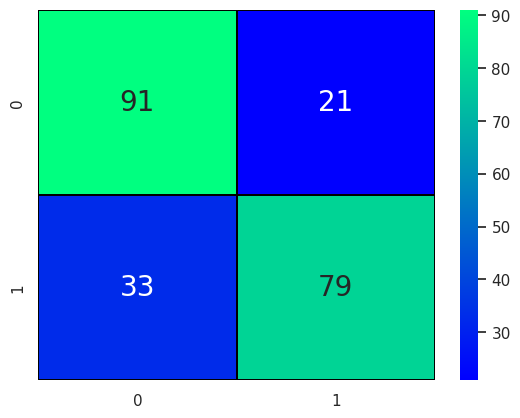

In [265]:
scv=StackingCVClassifier(classifiers=[lr,svm,gnb,knn,rfc], meta_classifier= tree_model)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score,'\n')
print(classification_report(y_test,scv_predicted))

sns.heatmap(scv_conf_matrix, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=scv_conf_matrix[0][0]
TN=scv_conf_matrix[1][1]
FN=scv_conf_matrix[1][0]
FP=scv_conf_matrix[0][1]

print('Testing Accuracy for Ensemble model:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Ensemble model:',(TP/(TP+FN)))
print('Testing Specificity for Ensemble model:',(TN/(TN+FP)))
print('Testing Precision for Ensemble model:',(TP/(TP+FP)))
